# Введение в Reinforcement Learning (Обучение с подкреплением)

**Обучение с подкреплением** — это область машинного обучения, в которой агент учится действовать в среде, чтобы максимизировать суммарное вознаграждение. В отличие от обучения с учителем, в RL нет "правильных ответов" — агент исследует среду, пробует разные действия и учится на основе наград.

## Основные понятия

- **Агент** — сущность, которая принимает решения (например, робот, игрок в игре, программа).
- **Среда (Environment)** — всё, с чем взаимодействует агент.
- **Состояние (State, $ s $ )** — описание текущей ситуации, в которой находится агент.
- **Действие (Action, $ a $ )** — выбор, который может сделать агент в данном состоянии.
- **Награда (Reward, $ r $ )** — числовой сигнал, получаемый агентом после выполнения действия.
- **Политика (Policy, $ \pi $ )** — стратегия поведения агента, то есть правило выбора действия в каждом состоянии.
- **Функция ценности (Value Function)** — оценка "хорошести" состояния (или пары состояние-действие) с точки зрения будущих наград.

## RL vs Supervised Learning

| Обучение с учителем            | Обучение с подкреплением        |
|--------------------------------|---------------------------------|
| Есть метки (правильные ответы) | Награды приходят с задержкой   |
| Независимые примеры            | Последовательная зависимость   |
| Оценка по точности             | Оценка по суммарной награде    |
| Нет взаимодействия             | Постоянное взаимодействие с окружающей средой |

## Примеры

Лабиринт

<img src=assets/lab.png>

Frozen Lake

<img src=assets/fl.png>




# Марковские процессы принятия решений (MDP)

Чтобы формализовать задачи обучения с подкреплением, используется модель **Марковского процесса принятия решений** (*Markov Decision Process, MDP*).

## Определение MDP

Марковский процесс принятия решений описывается кортежем:

$$
\langle \mathcal{S}, \mathcal{A}, \mathcal{P}, \mathcal{R}, \gamma \rangle
$$

где:

- $ \mathcal{S} $ — множество состояний среды.
- $ \mathcal{A} $ — множество возможных действий.
- $ \mathcal{P}(s' \mid s, a) $ — вероятность перехода в состояние $ s' $ при выполнении действия $ a $ в состоянии $ s $ (**динамика среды**).
- $ \mathcal{R}(s, a) $ — функция награды, определяющая ожидаемое вознаграждение за выполнение действия $ a $ в состоянии $ s $.
- $ \gamma \in [0,1] $ — коэффициент дисконтирования (discount factor), определяющий важность будущих наград.


## Марковское свойство

Процесс обладает **Марковским свойством**, если будущее зависит от текущего состояния и действия, а не от истории:

$$
P(s_{t+1} \mid s_t, a_t, s_{t-1}, a_{t-1}, \ldots, s_0, a_0) = P(s_{t+1} \mid s_t, a_t)
$$

То есть, текущее состояние полностью описывает всё, что нужно для предсказания следующего шага.

## Политика

**Политика** — это стратегия агента, определяющая вероятность выбрать действие $ a $ в состоянии $ s $:

$$
\pi(a \mid s) = P(a_t = a \mid s_t = s)
$$

Политика может быть:
- **Детерминированной**: $ a = \pi(s) $
- **Стохастической**: $ a \sim \pi(\cdot \mid s) $


## Вознаграждение и дисконтирование

Цель агента — **максимизировать суммарное дисконтированное вознаграждение**:


где:
- $ \gamma $ ближе к 0 — агент "короткозор",
- $ \gamma $ ближе к 1 — агент "дальновидный".


## Цель

Найти политику, которая максимизирует **суммарную ожидаемую награду**, то есть:


$$
G_t = r_{t} + \gamma r_{t+1} + \gamma^2 r_{t+2} + \ldots = \sum_{k=0}^{\infty} \gamma^k r_{t+k}
$$

$$
\pi^* = \argmax_\pi \mathbb{E} \left[ G_t \right]
$$

где:

- $ r_t $ — награда на шаге $ t $,
- $ \gamma \in [0,1] $ — коэффициент дисконтирования (отражает предпочтение краткосрочных наград над долгосрочными).

# Политика и функции ценности

Чтобы оценивать, насколько хороши состояния и действия в контексте некоторой политики, используются **функции ценности**.


## Функция ценности состояния

**Функция ценности состояния** $ V^{\pi}(s) $ — это ожидаемая суммарная награда, которую агент получит, начиная из состояния $ s $ и следуя политике $ \pi $:

$$
V^{\pi}(s) = \mathbb{E}_{\pi} \left[ \sum_{t=0}^{\infty} \gamma^t r_t \mid s_0 = s \right]
$$

## Функция ценности действия

**Функция ценности действия** $ Q^{\pi}(s, a) $ — это ожидаемая суммарная награда, которую агент получит, начиная из состояния $ s $, выполнив действие $ a $, и далее следуя политике $ \pi $:

$$
Q^{\pi}(s, a) = \mathbb{E}_{\pi} \left[ \sum_{t=0}^{\infty} \gamma^t r_t \mid s_0 = s, a_0 = a \right]
$$

## Связь между $ V^{\pi} $ и $ Q^{\pi} $

Значение состояния можно выразить через значение действий:

$$
V^{\pi}(s) = \sum_{a} \pi(a \mid s) Q^{\pi}(s, a)
$$

## Теорема (Bellman уравнения)

Функции ценности удовлетворяют рекурсивным уравнениям Беллмана.

### Для $ V^{\pi}(s) $:

$$
V^{\pi}(s) = \sum_{a} \pi(a \mid s) \sum_{s'} P(s' \mid s, a) \left[ R(s, a, s') + \gamma V^{\pi}(s') \right]
$$

### Для $ Q^{\pi}(s, a) $:

$$
Q^{\pi}(s, a) = \sum_{s'} P(s' \mid s, a) \left[ R(s, a, s') + \gamma \sum_{a'} \pi(a' \mid s') Q^{\pi}(s', a') \right]
$$


### Пример работы с уравнениями Беллмана

<img src=./assets/vbellman_ex.png>

$$
V^{\pi}(s) = \sum_{a} \pi(a \mid s) \sum_{s'} P(s' \mid s, a) \left[ R(s, a, s') + \gamma V^{\pi}(s') \right]
$$


## Оптимальные функции ценности

- **Оптимальная функция ценности состояния**:

$$
V^*(s) = \max_{\pi} V^{\pi}(s)
$$

- **Оптимальная функция ценности действия**:

$$
Q^*(s, a) = \max_{\pi} Q^{\pi}(s, a)
$$

## Теорема (уравения Беллмана оптимальности)

$$
V^*(s) = \max_{a} \mathbb{E} \left[ r_t + \gamma V^*(s_{t+1}) \right]
$$

$$
Q^*(s, a) = \mathbb{E} \left[ r_t + \gamma \max_{a'} Q^*(s_{t+1}, a') \right]
$$



## Утверждение

Оптимальная политика $ \pi^* $ выбирает действия, которые максимизируют $ Q^* $:

$$
\pi^*(s) = \arg\max_{a} Q^*(s, a)
$$

# Обучение с использованием опыта

До этого момента мы предполагали, что знаем модель среды: вероятности переходов $ P(s' \mid s, a) $ и функции награды $ R(s, a, s') $. Однако на практике агент часто **не знает модель**, а учится **по взаимодействию с окружением**.

## Идея алгоритма

В цикле повторяем:
1. Собираем опыт
2. Оцениваем функцию ценности
3. Обновляем политику

### Эпсилон-жадная стратегия

Для того чтобы агент исследовал среду и избегал локальных минимумов, используется **ε-жадная стратегия**. Она позволяет сбалансировать исследование (exploration) и использование накопленных знаний (exploitation).

- **Exploration** (исследование): с вероятностью \( \epsilon \) агент выбирает случайное действие.
- **Exploitation** (использование знаний): с вероятностью \( 1 - \epsilon \) агент выбирает действие с максимальным ожидаемым вознаграждением.

$$
a_t = 
\begin{cases} 
\text{случайное действие}, & \text{с вероятностью } \epsilon \\
\arg\max_a Q(s_t, a), & \text{с вероятностью } 1 - \epsilon 
\end{cases}
$$

Такой подход помогает агенту избежать ситуаций, где он будет застревать, всегда выбирая одно и то же действие.


Проблема: оценивать функции ценности без знаний о модели среды:

$$
Q^{\pi}(s, a) = \sum_{s'} P(s' \mid s, a) \left[ r_t + \gamma \sum_{a'} \pi(a' \mid s') Q^{\pi}(s', a') \right] \approx r_t + \gamma Q(s_{t+1}, a_{t+1})
$$

Аналогично можно оценить оптимальную $ Q $ функцию

## Алгоритм SARSA (on-policy)

Название расшифровывается как: **State, Action, Reward, next State, next Action**.

Обновление происходит по формуле:

$$
Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha \left[ r_t + \gamma Q(s_{t+1}, a_{t+1}) - Q(s_t, a_t) \right]
$$

- Следующее действие $ a_{t+1} $ выбирается **по текущей политике** (например, ε-жадной)


### Pseudocode (SARSA)

```python
Инициализировать Q(s, a) произвольно
Для каждого эпизода:
    s ← начальное состояние
    a ← выбрать действие из s (по ε-жадной стратегии)
    Пока s не терминальное:
        Выполнить a, получить r, s'
        Выбрать a' из s' (по ε-жадной стратегии)
        Q(s, a) ← Q(s, a) + α [r + γ Q(s', a') − Q(s, a)]
        s ← s', a ← a'
```


## Алгоритм Q-learning (off-policy)

В отличие от SARSA, Q-learning использует **максимальное значение** Q в следующем состоянии:

$$
Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha \left[ r_t + \gamma \max_{a'} Q(s_{t+1}, a') - Q(s_t, a_t) \right]
$$

- Следующее действие выбирается по максимальному Q, **независимо от текущей политики**
- Это делает алгоритм **off-policy**: он обучается, как будто всегда выбирает лучшие действия


### Pseudocode (Q-learning)

```python
Инициализировать Q(s, a) произвольно
Для каждого эпизода:
    s ← начальное состояние
    Пока s не терминальное:
        a ← выбрать действие из s (по ε-жадной стратегии)
        Выполнить a, получить r, s'
        Q(s, a) ← Q(s, a) + α [r + γ max_{a'} Q(s', a') − Q(s, a)]
        s ← s'
```

## Сравнение SARSA и Q-learning

| Характеристика     | SARSA (on-policy)         | Q-learning (off-policy)        |
|---------------------|----------------------------|----------------------------------|
| Использует следующее действие $ a_{t+1} $ | ✅ | ❌ (берёт максимум по действиям) |
| Подвержен риску в ранних фазах | меньше | больше (агрессивное обновление)  |
| Надёжность          | выше (реалистичная оценка) | выше при идеальных условиях     |


# Практика: Обучаем агента в `FrozenLake`

## Установка и подключение зависимостей

In [10]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange

## Создание среды

In [11]:
env = gym.make("Taxi-v3")  

n_states = env.observation_space.n
n_actions = env.action_space.n

## ε-жадная стратегия

In [12]:
def epsilon_greedy(Q, state, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(n_actions)
    return np.argmax(Q[state])

## SARSA-алгоритм

In [13]:
def sarsa(env, episodes=10_000, alpha=0.2, gamma=0.99, epsilon=0.2, min_epsilon=0.01):
    Q = np.zeros((n_states, n_actions))
    rewards = []

    for _ in trange(episodes):
        epsilon = max(min_epsilon, epsilon * 0.99)

        state, _ = env.reset()
        action = epsilon_greedy(Q, state, epsilon)
        total_reward = 0

        done = False
        while not done:
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            next_action = epsilon_greedy(Q, next_state, epsilon)
            Q[state, action] += alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])

            state, action = next_state, next_action
            total_reward += reward

        rewards.append(total_reward)

    return Q, rewards

## Q-learning

In [14]:
def q_learning(env, episodes=10_000, alpha=0.2, gamma=0.99, epsilon=0.2, min_epsilon=0.01):
    Q = np.zeros((n_states, n_actions))
    rewards = []

    for _ in trange(episodes):
        epsilon = max(min_epsilon, epsilon * 0.99)

        state, _ = env.reset()
        total_reward = 0

        done = False
        while not done:
            action = epsilon_greedy(Q, state, epsilon)
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])

            state = next_state
            total_reward += reward

        rewards.append(total_reward)

    return Q, rewards

## Обучение и сравнение

100%|██████████| 10000/10000 [00:16<00:00, 611.68it/s]


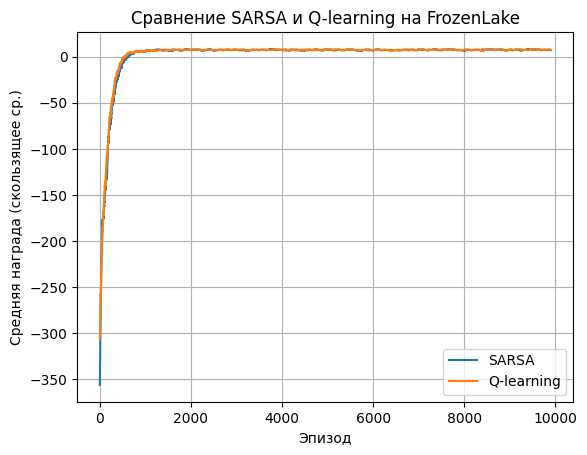

In [15]:
sarsa_Q, sarsa_rewards = sarsa(env)
q_Q, q_rewards = q_learning(env)

def moving_average(x, window=100):
    return np.convolve(x, np.ones(window)/window, mode='valid')

plt.plot(moving_average(sarsa_rewards), label='SARSA')
plt.plot(moving_average(q_rewards), label='Q-learning')
plt.xlabel('Эпизод')
plt.ylabel('Средняя награда (скользящее ср.)')
plt.legend()
plt.title('Сравнение SARSA и Q-learning на FrozenLake')
plt.grid()
plt.show()


## Выводы

- **SARSA** делает более осторожные шаги, потому что учитывает действия, которые агент действительно будет предпринимать.
- **Q-learning** использует жадную оценку и может переоценивать действия, что в средах с шумом (как `FrozenLake`) может приводить к менее стабильному обучению.
- При грамотной настройке гиперпараметров оба алгоритма могут выучить разумную стратегию.


## Визуализация работы обученного агента

In [19]:
import gymnasium as gym

env = gym.make("Taxi-v3", render_mode="human")
observation, info = env.reset()

for _ in range(100):
    action = epsilon_greedy(q_Q, observation, 0)
    observation, reward, terminated, truncated, info = env.step(action)
    
    if terminated or truncated:
        observation, info = env.reset()
        break

env.close()